In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels as sm
from datetime import datetime

matplotlib.style.use ("Solarize_Light2")

%matplotlib inline

In [2]:
temp_df = pd.read_csv("./Temperature.csv")
temp_df['DateTime'] = pd.to_datetime(temp_df['DateTime'], dayfirst=True)
temp_df.index = pd.to_datetime(temp_df['DateTime'], dayfirst=True)
temp_df.sort_index(inplace=True)

In [3]:
temp_df.head

<bound method NDFrame.head of                                DateTime  Temperature
DateTime                                            
2018-05-23 21:03:00 2018-05-23 21:03:00       81.500
2018-05-24 02:32:00 2018-05-24 02:32:00       87.575
2018-05-24 04:31:00 2018-05-24 04:31:00       80.825
2018-05-24 05:31:00 2018-05-24 05:31:00       75.200
2018-05-24 06:31:00 2018-05-24 06:31:00       71.375
...                                 ...          ...
2023-12-04 23:31:00 2023-12-04 23:31:00       68.450
2023-12-05 00:31:00 2023-12-05 00:31:00       62.375
2023-12-05 01:31:00 2023-12-05 01:31:00       59.675
2023-12-05 02:31:00 2023-12-05 02:31:00       57.650
2023-12-05 03:31:00 2023-12-05 03:31:00       56.750

[55953 rows x 2 columns]>

In [4]:
temp_df.shape

(55953, 2)

In [5]:
temp_df['Temperature']

DateTime
2018-05-23 21:03:00    81.500
2018-05-24 02:32:00    87.575
2018-05-24 04:31:00    80.825
2018-05-24 05:31:00    75.200
2018-05-24 06:31:00    71.375
                        ...  
2023-12-04 23:31:00    68.450
2023-12-05 00:31:00    62.375
2023-12-05 01:31:00    59.675
2023-12-05 02:31:00    57.650
2023-12-05 03:31:00    56.750
Name: Temperature, Length: 55953, dtype: float64

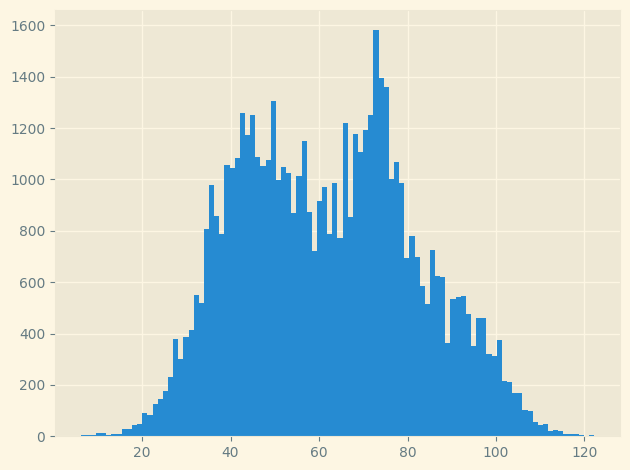

In [6]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(temp_df['Temperature'], bins=100)

In [7]:
temp_df.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55953 entries, 2018-05-23 21:03:00 to 2023-12-05 03:31:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     55953 non-null  datetime64[ns]
 1   Temperature  55953 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


In [15]:
temp_df.dtypes

DateTime       datetime64[ns]
Temperature           float64
dtype: object

In [16]:
temp_df.columns


Index(['DateTime', 'Temperature'], dtype='object')

In [8]:
temp_df.isnull().sum()


DateTime       0
Temperature    0
dtype: int64

In [9]:
temp_df.dropna()

,DateTime,Temperature
DateTime,,
2018-05-23 21:03:00,2018-05-23 21:03:00,81.500
2018-05-24 02:32:00,2018-05-24 02:32:00,87.575
2018-05-24 04:31:00,2018-05-24 04:31:00,80.825
2018-05-24 05:31:00,2018-05-24 05:31:00,75.200
2018-05-24 06:31:00,2018-05-24 06:31:00,71.375
...,...,...
2023-12-04 23:31:00,2023-12-04 23:31:00,68.450
2023-12-05 00:31:00,2023-12-05 00:31:00,62.375
2023-12-05 01:31:00,2023-12-05 01:31:00,59.675


In [10]:
temp_df.Temperature.values

array([81.5  , 87.575, 80.825, ..., 59.675, 57.65 , 56.75 ])

In [22]:
temp_df.Temperature.size

55953

In [23]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55953 entries, 2018-05-23 21:03:00 to 2023-12-05 03:31:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     55953 non-null  datetime64[ns]
 1   Temperature  55952 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


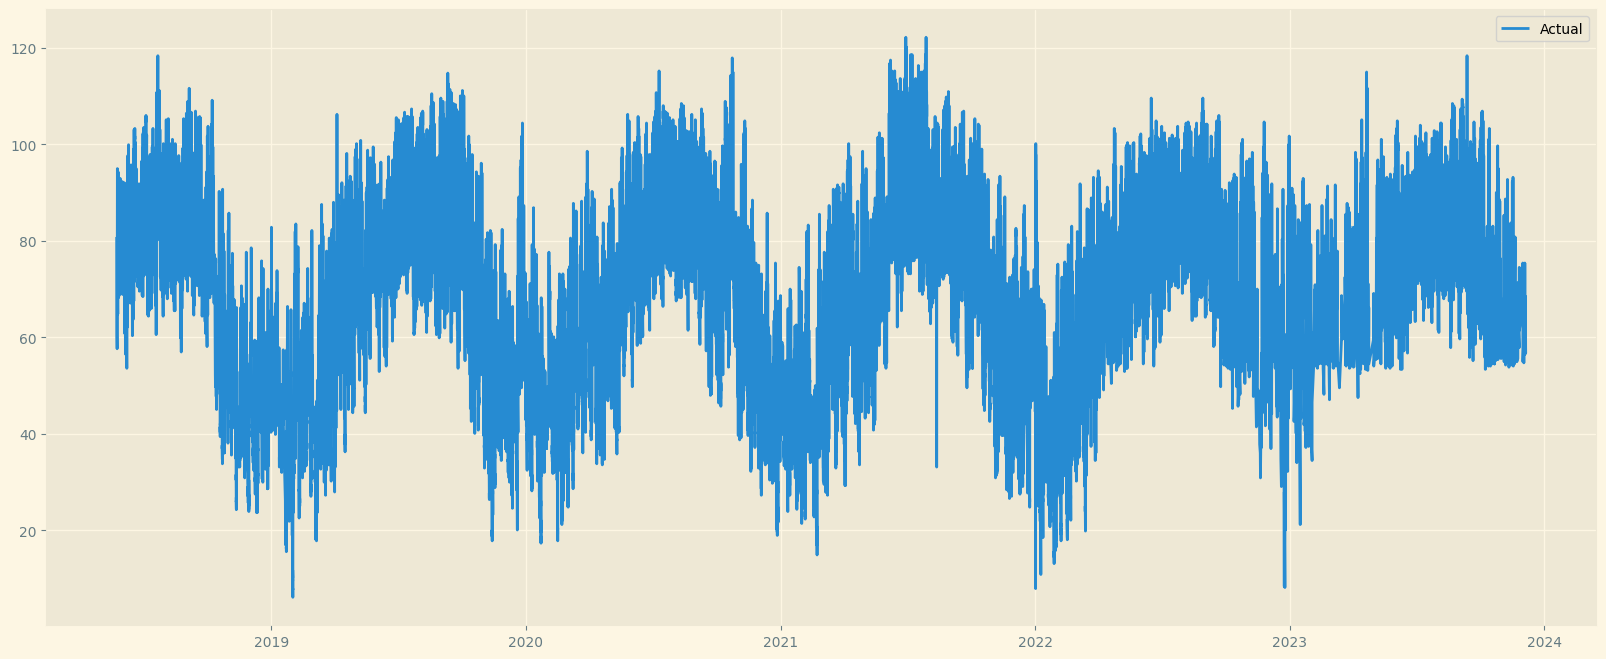

In [24]:
X = temp_df.drop (columns=['Temperature'])
y = temp_df['Temperature']
plt.figure(figsize=(20,8))
plt.plot(X, y, label='Actual')
plt.legend()

In [25]:

print ("X", X.shape)
print ("y", y.shape)

X (55953, 1)
y (55953,)


In [26]:
#Plot auto-correlation in the data (the plot shows that future data has a strong correlation to the past data)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

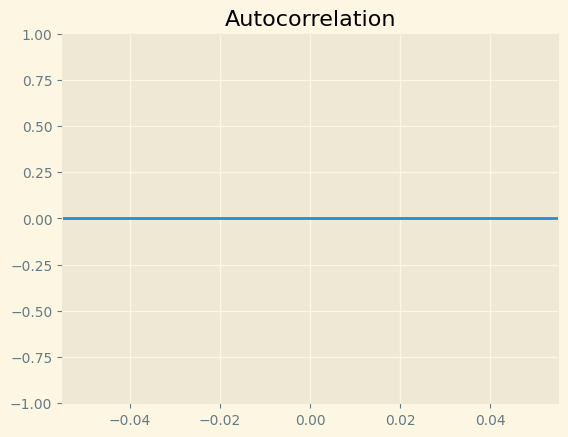

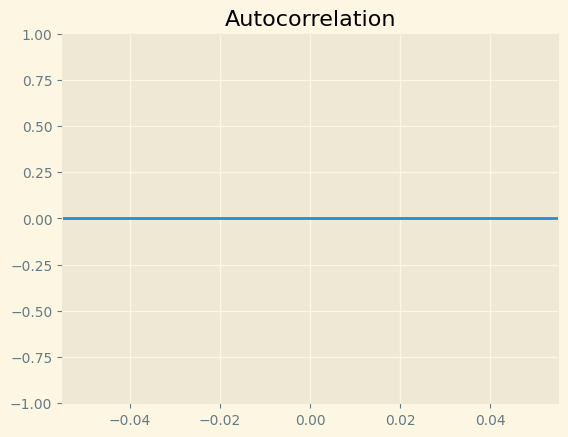

In [27]:
plot_acf(temp_df['Temperature'])

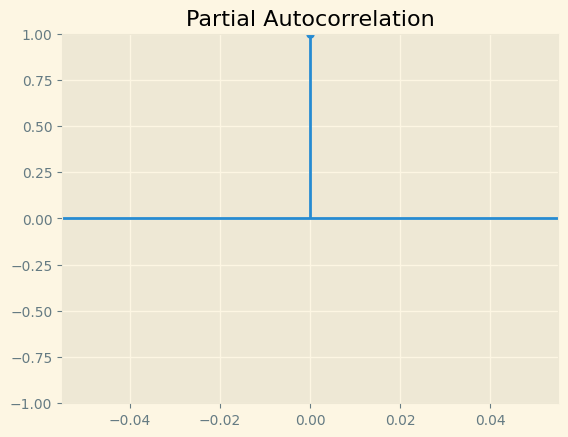

In [28]:
plot_pacf(temp_df['Temperature'])
plt.show()